In [1]:
import pickle as pk
import glob
from utils.utils import graph_plot
from graph_model import LightningEGNN_net
import torch
from pathlib import Path

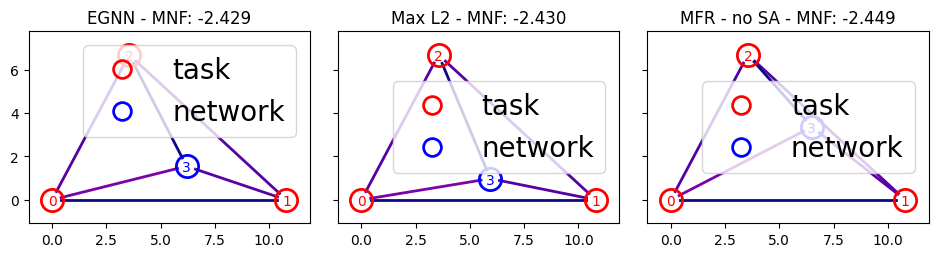

In [10]:
from utils.utils import evalModelConvex,plot_config
import matplotlib.pyplot as plt
import numpy as np

with open('experimentos_paper2/exp1/1Run_L2_Comm_config.pt', 'rb') as f:
    L2_config = pk.load(f)

with open('experimentos_paper2/exp1/1Run_nacho_Comm_config.pt', 'rb') as f:
    nacho_config = pk.load(f)

with open('experimentos_paper2/exp1/1Run_EGNN_Comm_config.pt', 'rb') as f:
    EGNN_config = pk.load(f)
with open('experimentos_paper2/exp1/1Run_task_configs.pt', 'rb') as f:
    TA = pk.load(f)


R_EGNN, C_EGNN, aik_EGNN=evalModelConvex(NA=EGNN_config, TA=TA)
R_L2, C_L2, aik_L2=evalModelConvex(NA=L2_config, TA=TA)
R_nacho, C_nacho, aik_nacho=evalModelConvex(NA=nacho_config, TA=TA)

fig2, ax2 = plt.subplots(1,3,figsize=(10,30), sharex=True, sharey=True)
fig2.subplots_adjust(left=0.05, bottom=0.06, right=0.95, top=0.94, wspace=0.1)

rates_fin_EGNN=np.sum(R_EGNN.reshape(4,4,6),axis=2)
plot_config(torch.vstack((TA, torch.from_numpy(EGNN_config))), ax=ax2[0], clear_axes=True, show=False, task_ids=np.arange(3),rates=rates_fin_EGNN)
ax2[0].set_title(f"EGNN - MNF: {C_EGNN:.3f}")#, EGNN: {y_model_EGNN.item():.3f}")

rates_L2=np.sum(R_L2.reshape(4,4,6),axis=2)
plot_config(torch.vstack((TA, torch.from_numpy(L2_config))), ax=ax2[1], clear_axes=True, show=False, task_ids=np.arange(3),rates=rates_L2)
ax2[1].set_title(f"Max L2 - MNF: {C_L2:.3f}")#, EGNN: {y_model_L2.item():.3f}")

rates_nacho=np.sum(R_nacho.reshape(4,4,6),axis=2)
plot_config(torch.vstack((TA, torch.from_numpy(nacho_config))), ax=ax2[2], clear_axes=True, show=False, task_ids=np.arange(3),rates=rates_nacho)
ax2[2].set_title(f"MFR - no SA - MNF: {C_nacho:.3f}")#, EGNN: {y_model_nacho.item():.3f}")

ax2[0].set_facecolor("white")
ax2[1].set_facecolor("white")
ax2[2].set_facecolor("white")


In [2]:
dir='./'

TRAIN_DATA_FILES=glob.glob(dir +"*_train.pt")
VAL_DATA_FILES=glob.glob(dir+"*_val.pt")
train_dataset=None
for TRAIN_DATA_FILE in TRAIN_DATA_FILES:
    with open(TRAIN_DATA_FILE, 'rb') as f:
        if train_dataset is None:
            train_dataset = pk.load(f)
        else:
            train_dataset+=pk.load(f)

val_dataset = None
for VAL_DATA_FILE in VAL_DATA_FILES:
    with open(VAL_DATA_FILE, 'rb') as f:
        if val_dataset is None:
            val_dataset = pk.load(f)
        else:
            val_dataset+=pk.load(f)   
            
print('train',len(train_dataset))   

train 5


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


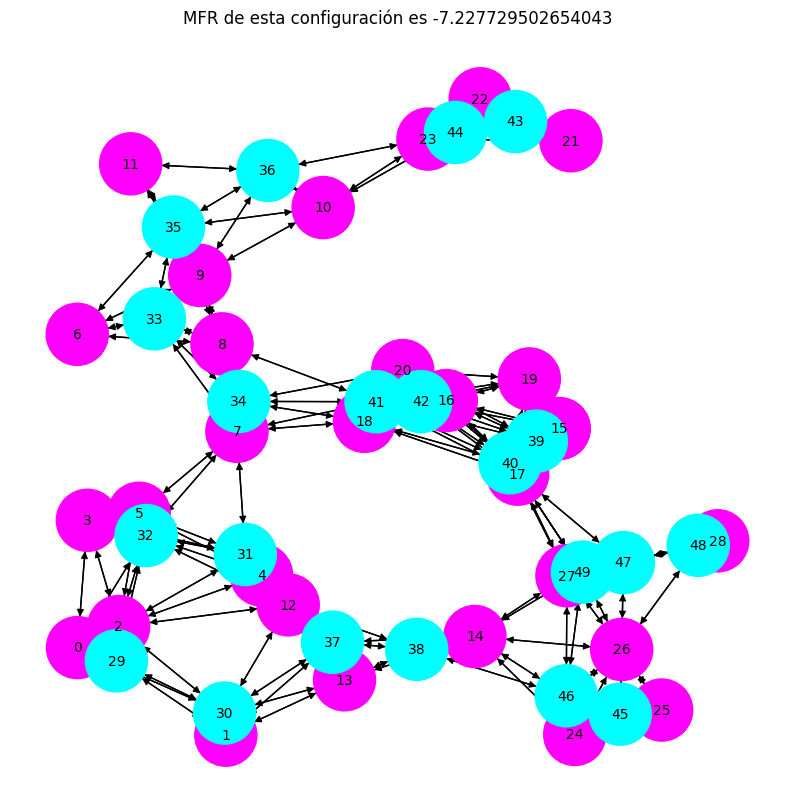

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


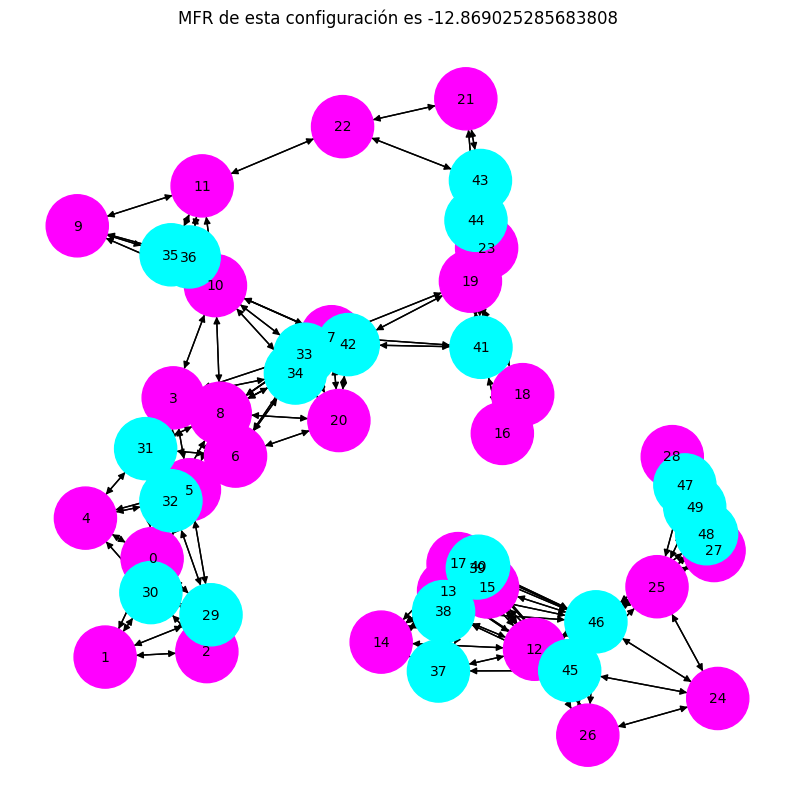

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


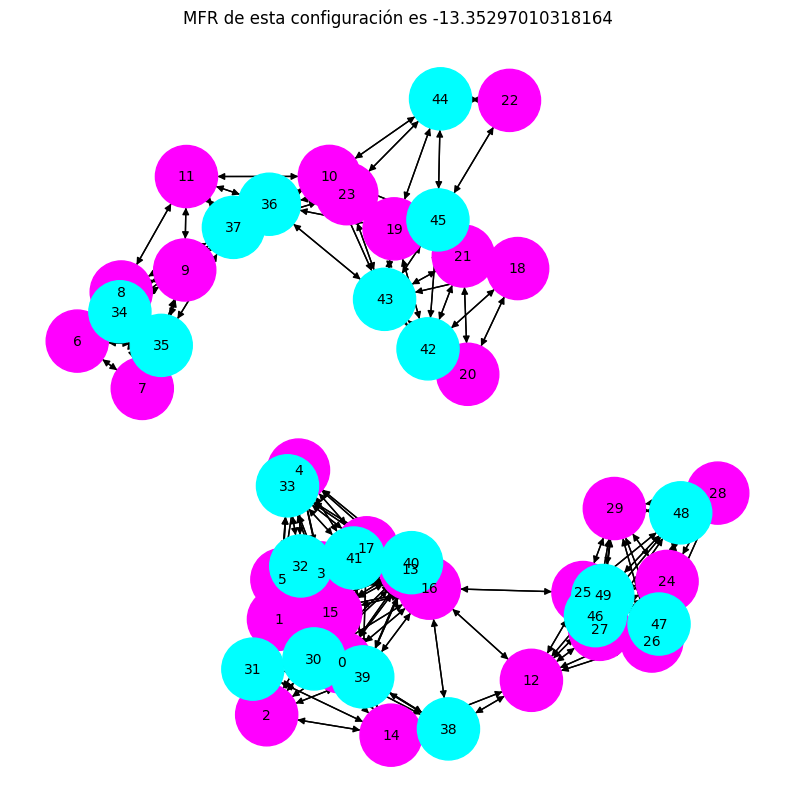

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


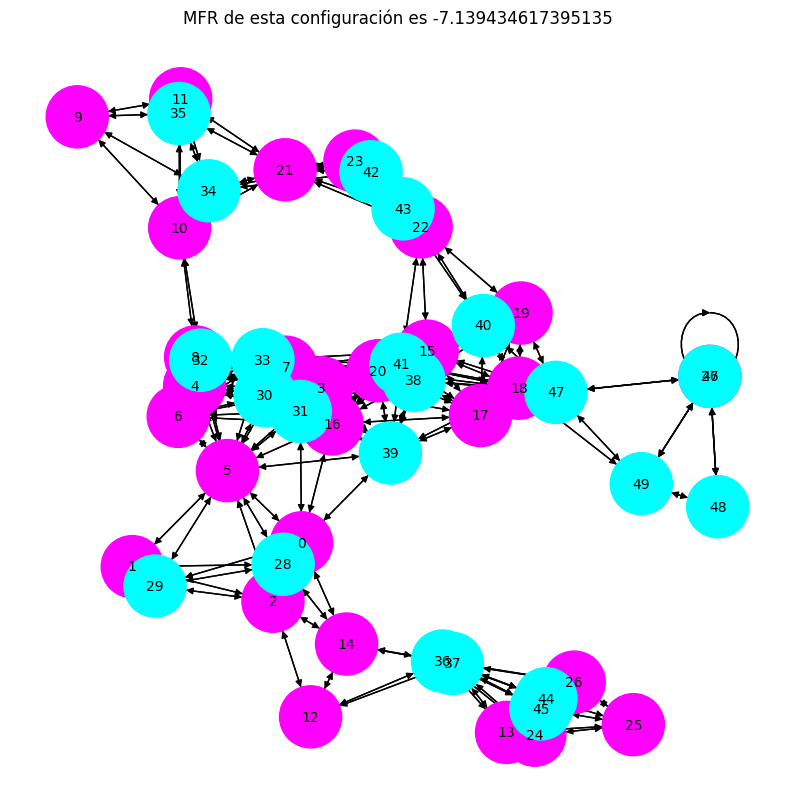

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


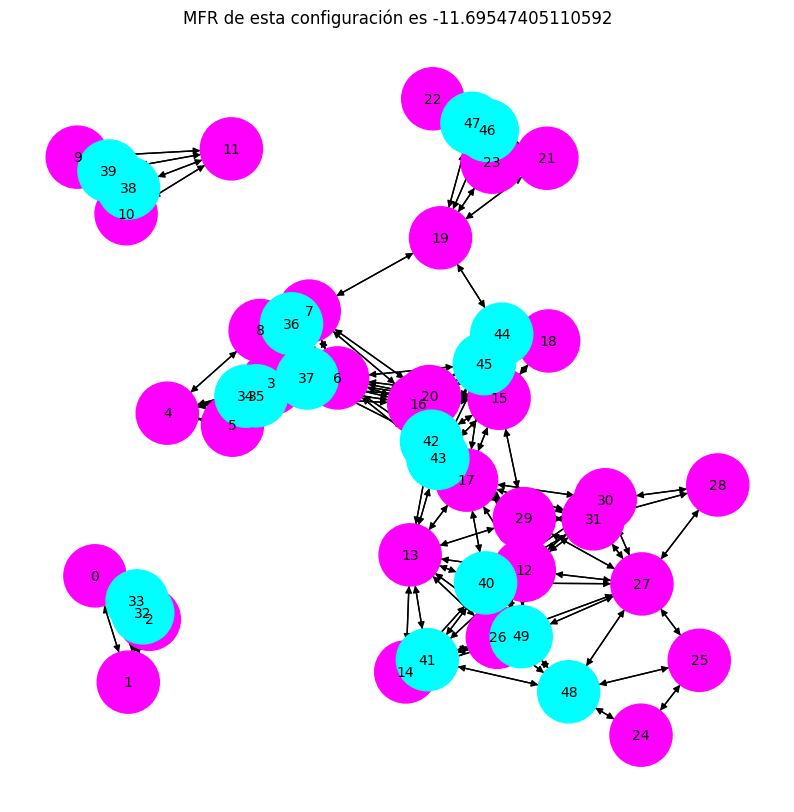

In [3]:
for i in range(len(train_dataset)):
    graph_plot(train_dataset[i].to('cpu'))